In [1]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
datatrend=pd.read_csv('../data/cleaned ecommence_data.csv')

In [3]:
datatrend.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Total_price,InvoiceYear,InvoiceMonth
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010,2010-12
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010,2010-12
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010,2010-12
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010,2010-12
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010,2010-12


# ANALYSIS SHOWING DIFFERNT COUNTRY WITH TOTAL AMOUNT OF GOODS BOUGHT

In [4]:
price = datatrend.groupby(['Country'])['Total_price'].sum().reset_index()
price= price.sort_values(['Total_price'], ascending=False)

In [5]:
#top 10 countries with highest amount bought
top10=price.head(10)
top10

,Country,Total_price
9,Libya,37690362.35
19,Somalia,37663830.57
23,Togo,37592496.96
11,Mali,37508467.02
7,Ghana,37414593.40
15,Nigeria,37364243.60
6,Ethiopia,37228695.13
13,Mozambique,37145464.36
18,Sierra Leone,37140824.43
0,Algeria,37140683.52


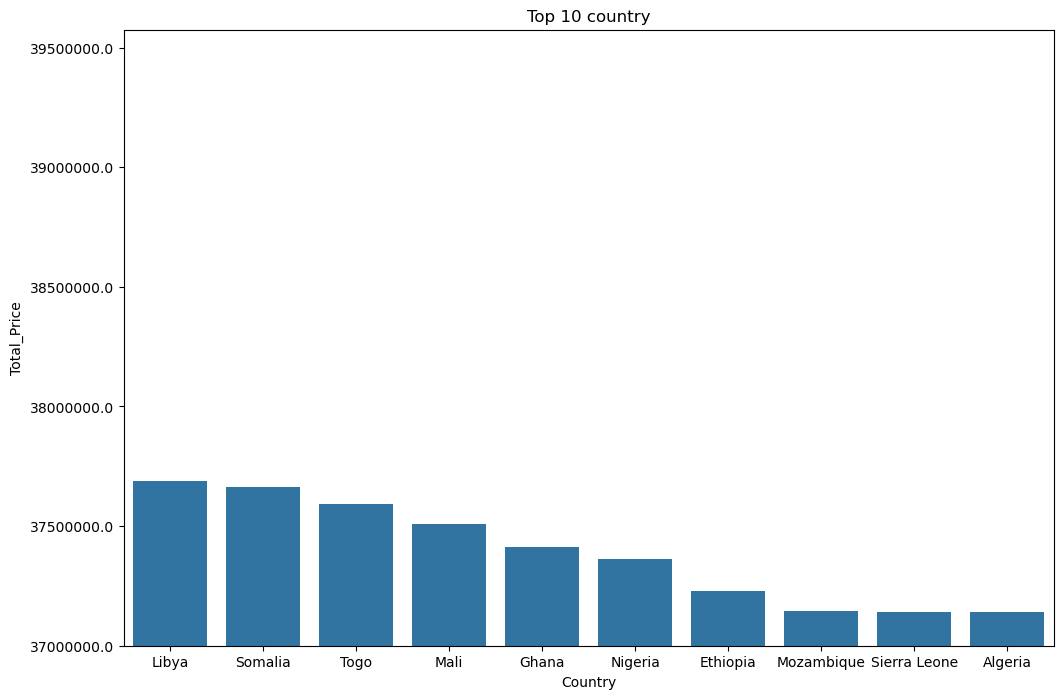

In [6]:
plt.figure(figsize=(12,8))
y_format = FuncFormatter(lambda x, _: f'{x / 1:.1f}')
ax = sns.barplot(x='Country', y='Total_price', data= top10)
ax.yaxis.set_major_formatter(y_format)
plt.ylim(37000000)
plt.title('Top 10 country')
plt.xlabel('Country')
plt.ylabel('Total_Price')
plt.show()

In [7]:
#Last 10 countries with lowest amount bought
last10=price.tail(10)
last10

,Country,Total_price
1,Benin,36921841.33
16,Rwanda,36864615.30
24,Tunisia,36837574.80
22,Tanzania,36820360.73
14,Niger,36808276.74
2,Burkina Faso,36671763.77
5,Egypt,36619734.48
25,Uganda,36598727.25
10,Madagascar,36524344.59
26,Zambia,36253058.16


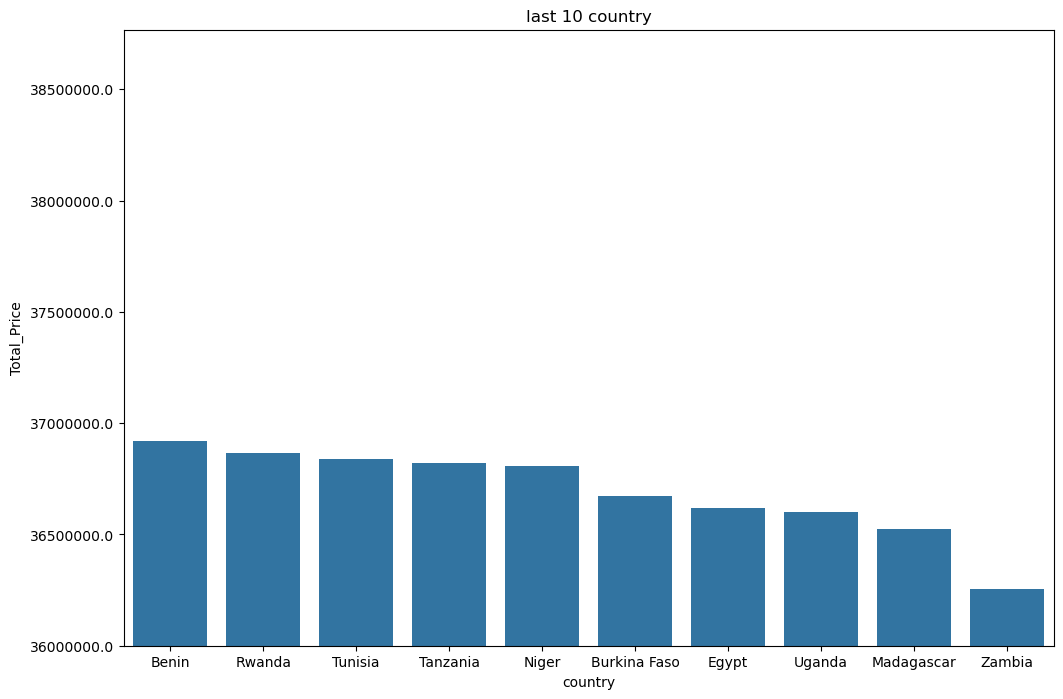

In [8]:
plt.figure(figsize=(12,8))
y_format = FuncFormatter(lambda x, _: f'{x / 1:.1f}')
ax = sns.barplot(x='Country', y='Total_price', data= last10)
ax.yaxis.set_major_formatter(y_format)
plt.ylim(36000000)
plt.title('last 10 country')
plt.xlabel('country')
plt.ylabel('Total_Price')
plt.show()

# OBSERVATION from Above Analysis
    This analysis shows that countries with  total amount of pruchases indicating most sales on the site comes from Libya and least sales comes from Zambia, therefore  further anaylsis can looked  why that is so inorder to increase the purchase from such countries

# COUNTRY WITH RESPECT TO NUMBER OF CUSTOMER FROM THEM

In [9]:
customer = datatrend.groupby(['Country'])['CustomerID'].nunique().reset_index()
customer= customer.sort_values(['CustomerID'], ascending=False)

In [10]:
#top 10 countries with highest NUMBER of customer
customer = customer.rename(columns={'CustomerID': 'No of Customers'})
customer.head(10)


,Country,No of Customers
13,Mozambique,3072
1,Benin,3054
23,Togo,3053
15,Nigeria,3051
2,Burkina Faso,3049
18,Sierra Leone,3046
11,Mali,3044
0,Algeria,3043
17,Senegal,3040
14,Niger,3039


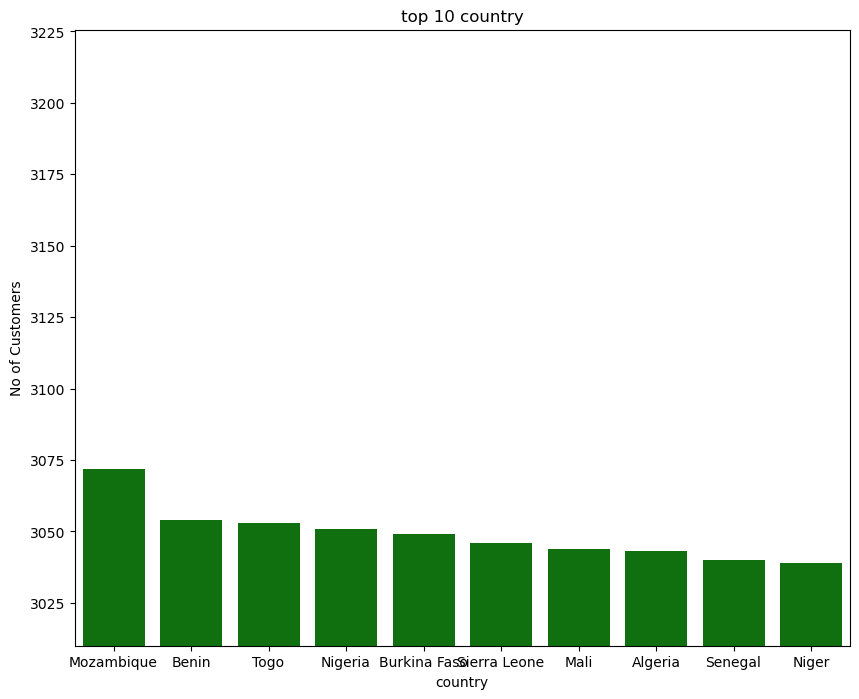

In [11]:
#top 10 countries with highest NUMBER of customer
Ctop10=customer.head(10)
plt.figure(figsize=(10,8))
sns.barplot( x = 'Country', y = 'No of Customers', data=Ctop10, color='green')
plt.title('top 10 country')
plt.ylim(3010)
plt.xlabel('country')
plt.ylabel('No of Customers')
plt.show()

In [12]:
#top 10 countries with highest NUMBER of customer
customer = customer.rename(columns={'CustomerID': 'No of Customers'})
customer.tail(10)


,Country,No of Customers
5,Egypt,3029
3,Cameroon,3029
24,Tunisia,3028
4,Cote d'Ivoire,3026
20,South Africa,3026
16,Rwanda,3018
8,Kenya,3009
19,Somalia,3008
12,Morocco,2993
25,Uganda,2981


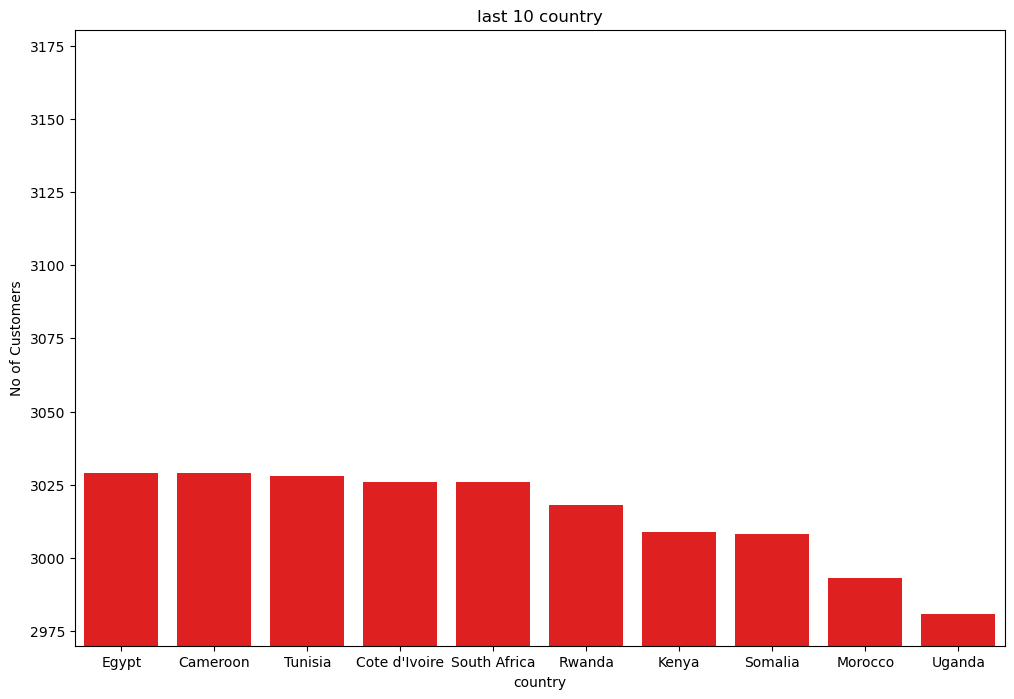

In [13]:
#last countries with lowest NUMBER of customer
Clast10=customer.tail(10)
plt.figure(figsize=(12,8))
sns.barplot( x = 'Country', y = 'No of Customers', data=Clast10, color='red')
plt.title('last 10 country')
plt.ylim(2970)
plt.xlabel('country')
plt.ylabel('No of Customers')
plt.show()

# OBSERVATION from Above Analysis
This analysis shows that countries with  total amount of customer purchasing on the site indicating most of the customer on the site comes from Mozambique and least comes from Uganda, therefore  further anaylsis can looked  why that is so inorder to increase the customer from such countries

# DIFFERNT GOODS BOUGHT IN RESPECT TO COUNTRY

In [14]:
country_des = datatrend.pivot_table(index='Country',
                                 columns='Description',
                                 aggfunc='size',
                                 fill_value=0)

country_des.head(5)

Description,Books,Cloths,Cosmetics,Electronics,Furniture,Jewelry,Kitchenware,Shoes,Sports Equipment,Toys
Country,,,,,,,,,,
Algeria,1422,1468,1452,1432,1401,1464,1410,1512,1482,1449
Benin,1456,1476,1423,1459,1423,1502,1516,1409,1503,1443
Burkina Faso,1428,1412,1448,1470,1465,1408,1512,1451,1408,1411
Cameroon,1452,1442,1529,1378,1483,1488,1432,1464,1459,1492
Cote d'Ivoire,1468,1509,1483,1456,1482,1459,1401,1419,1492,1476


In [15]:

# Total quantity sold per product
top_products = datatrend.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.head()

Description
Shoes               2069190
Jewelry             2065153
Toys                2063396
Furniture           2063221
Sports Equipment    2060571
Name: Quantity, dtype: int64

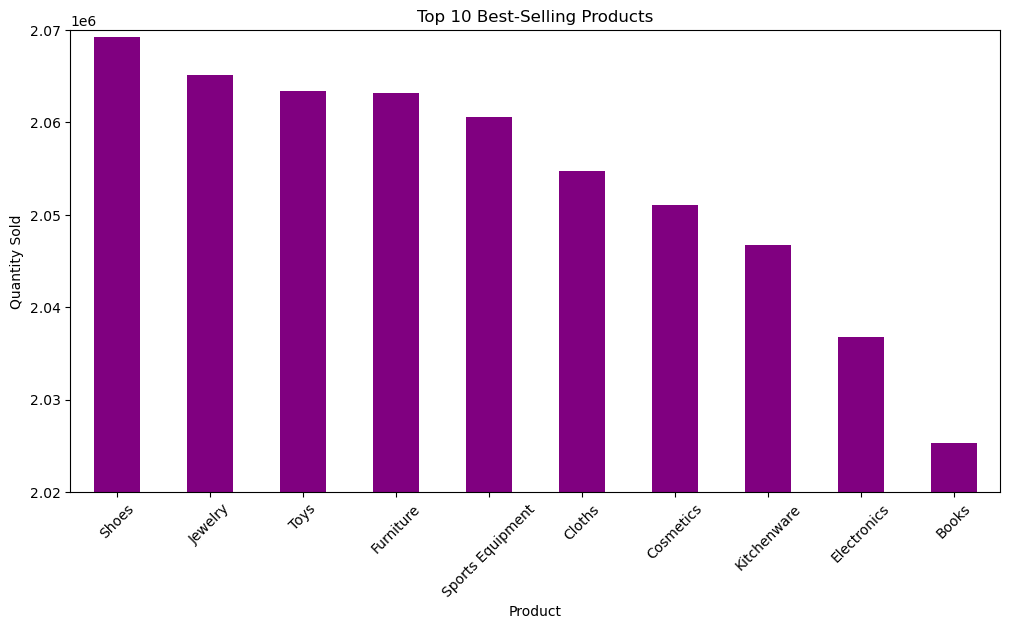

In [16]:
# Plot
top_products.plot(kind='bar', figsize=(12,6), color='purple')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.ylim(2.02e6, 2.07e6)
plt.show()

# OBSERVATION from Above Analysis

- **Shoes** are the best-selling product, leading with the highest quantity sold.
- **Jewelry and Toys** also perform well, making up the next top categories.
- **Books** have the lowest sales among the ten categories, significantly trailing behind others.
- **Furniture, Sports Equipment, and Clothes** maintain a moderate sales volume.
- **Electronics and Kitchenware** are on the lower end of the spectrum, but still outperform Books.


# SALES TREND

In [17]:

# Convert 'InvoiceDate' column to datetime
datatrend['InvoiceDate'] = pd.to_datetime(datatrend['InvoiceDate'])

# Group the data by month and calculate the total monthly sales
monthly_sales = datatrend.groupby(datatrend['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

In [18]:
monthly_sales.head()

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
Freq: M, Name: Quantity, dtype: int64

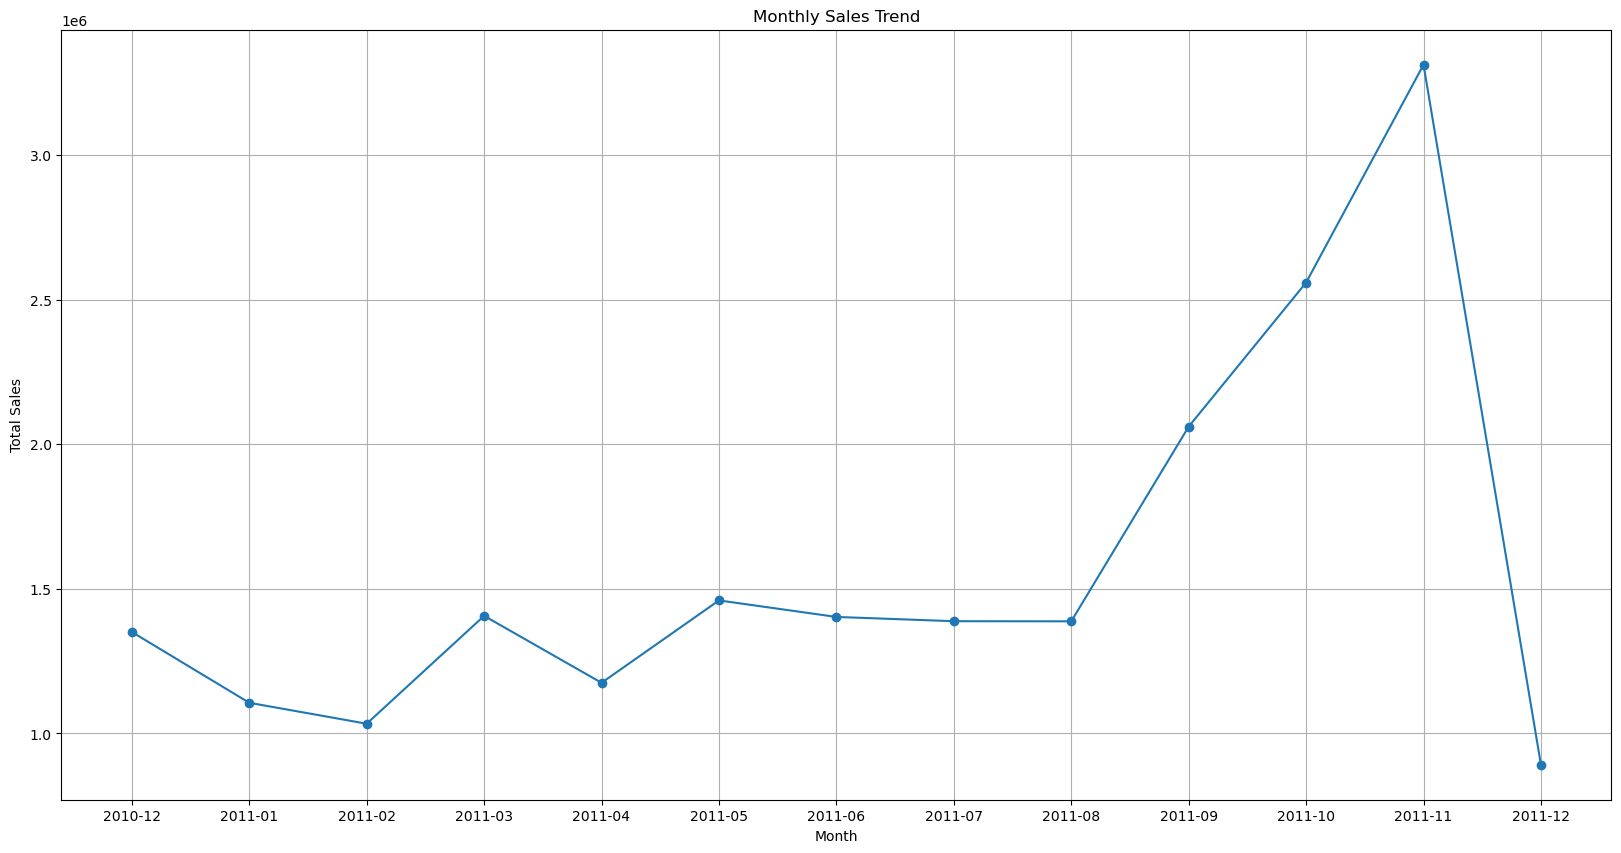

In [19]:
# Create a line chart
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Display the plot
plt.show()


# OBSERVATION from Above Analysis

- **December to February Dip:** This could indicate a post-holiday slump where demand slows down after peak shopping seasons.
- **February to March Recovery:** Perhaps a seasonal trend or promotional activity helped boost sales during this period.
- **April Decline:** Possible factors—market conditions, inventory issues, or consumer behavior shifts.
- **May to August Stability:** A sign of consistent demand, possibly reflecting steady customer engagement or industry stability.
- **August to November Surge:** This could be due to back-to-school shopping, seasonal promotions, or holiday prep.
- **November Peak:** Likely the result of major shopping events like **Black Friday**, boosting sales dramatically.
- **November to December Drop:** Could be post-Black Friday saturation, where customers had already made their purchases.


# CUSTOMER FREQUENCY [ How often a customer makes purchases over a specific period ]

In [20]:
#calculate the customers frequency
most_freqent_customer = datatrend.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Renaming the 'count' column to 'frequency'
most_freqent_customer = most_freqent_customer.rename(columns={'InvoiceNo': 'Frequency'})

most_freqent_customer = most_freqent_customer.sort_values(['Frequency'], ascending=False)
most_freqent_customer

,CustomerID,Frequency
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
...,...,...
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1


In [21]:
# top 10 
frequency_15 = most_freqent_customer.head(15)
frequency_15

,CustomerID,Frequency
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
2192,15311.0,118
487,12971.0,89
1615,14527.0,86
803,13408.0,81
1703,14646.0,77


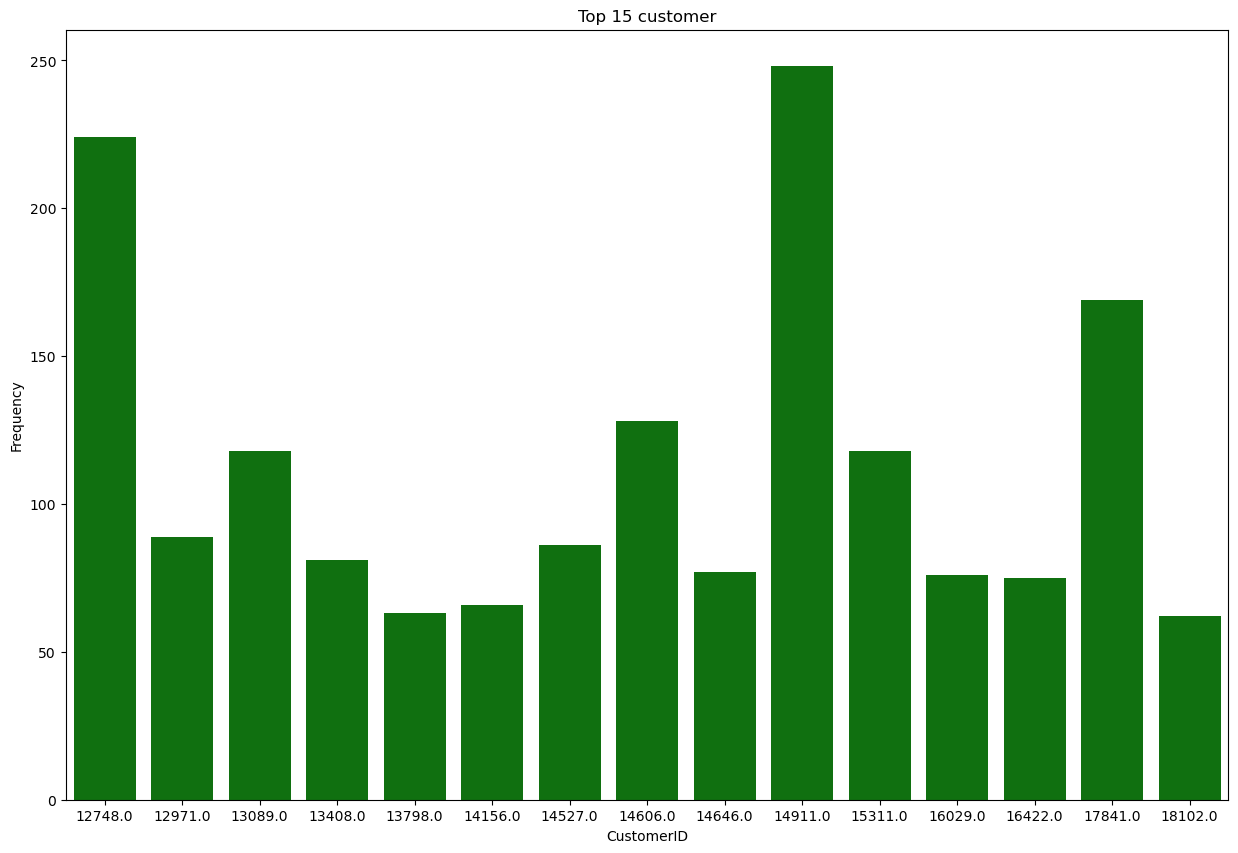

In [22]:
# top 10 loyal
plt.figure(figsize=(15,10))
sns.barplot( x ='CustomerID', y= 'Frequency', data=frequency_15, color='green'
           )
plt.title('Top 15 customer')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()

In [23]:
# last 10
last_10 = most_freqent_customer.tail(10)
last_10

,CustomerID,Frequency
3007,16412.0,1
1138,13874.0,1
1140,13876.0,1
3003,16406.0,1
3001,16404.0,1
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1
990,13670.0,1


# Observations above Analysis:
- **Customer 14911.0** has the highest frequency, surpassing 250 transactions.
- **Customer 12748.0** follows closely, showing strong engagement with over 225 transactions.
- **Customer 17841.0, 13089.0, and 14606.0** also rank high in terms of purchases.
- **Customer 13798.0** and a few others have relatively lower engagement, suggesting either selective or periodic purchasing habits.


# CUSTOMER MONETARY [ The total amount of money a customer has spent ]

In [24]:
spending_customer = datatrend.groupby(['CustomerID'])['Total_price'].sum().reset_index()
spending_customer = spending_customer.sort_values(['Total_price'], ascending=False)
spending_customer = spending_customer.rename(columns={'Total_price': 'Total money spent'})
spending_customer

,CustomerID,Total money spent
4042,17841.0,20383830.65
1895,14911.0,15362741.47
1300,14096.0,12965429.74
330,12748.0,11912482.34
1674,14606.0,7144512.92
...,...,...
777,13366.0,99.12
3677,17347.0,66.30
3351,16881.0,60.32
2525,15753.0,30.82


In [25]:
top10spending_customer=spending_customer.head(10)
top10spending_customer

,CustomerID,Total money spent
4042,17841.0,20383830.65
1895,14911.0,15362741.47
1300,14096.0,12965429.74
330,12748.0,11912482.34
1674,14606.0,7144512.92
2192,15311.0,6301150.63
1703,14646.0,5418075.66
568,13089.0,4739395.74
698,13263.0,4233075.52
1447,14298.0,4123714.52


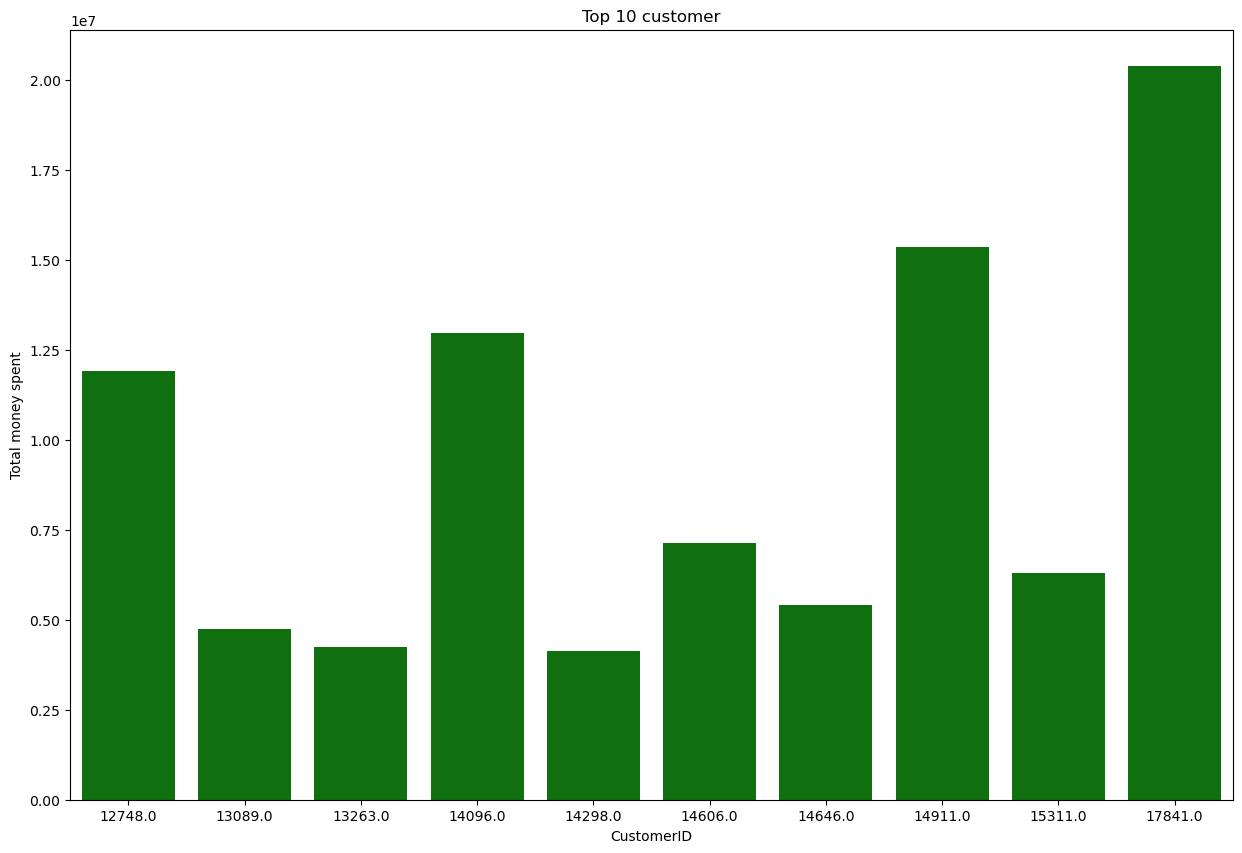

In [26]:
plt.figure(figsize=(15,10))
sns.barplot( x ='CustomerID', y= 'Total money spent', data=top10spending_customer, color='green')
plt.title('Top 10 customer')
plt.xlabel('CustomerID')
plt.ylabel('Total money spent')
plt.show()

In [27]:
last10spending_customer = spending_customer.tail(10)
last10spending_customer

,CustomerID,Total money spent
727,13302.0,274.93
3242,16737.0,214.89
3991,17763.0,200.42
1010,13703.0,112.95
1536,14424.0,99.18
777,13366.0,99.12
3677,17347.0,66.30
3351,16881.0,60.32
2525,15753.0,30.82
2350,15524.0,17.36


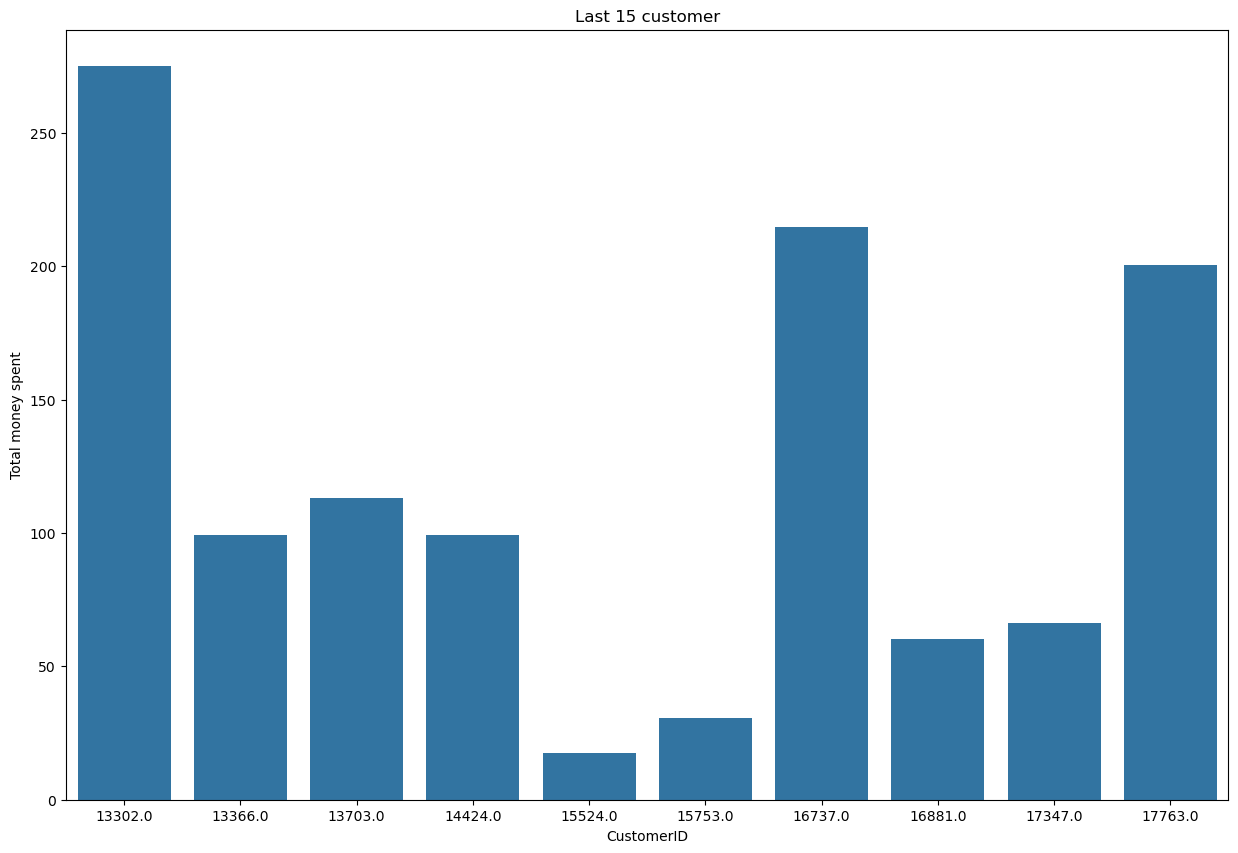

In [28]:
plt.figure(figsize=(15,10))
sns.barplot( x ='CustomerID', y= 'Total money spent', data=last10spending_customer )
plt.title('Last 15 customer')
plt.xlabel('CustomerID')
plt.ylabel('Total money spent')
plt.show()

# Observations above Analysis:
- **CustomerID 17841.0** leads with the highest spending, surpassing **20383830.65**, making them the most valuable customer.
- **CustomerIDs 12748.0, 14096.0, and 14911.0** each have significant spending, clustered around **12,500,000**.
- **Customer 14606.0** follows closely, nearing **1.0e7**.
- **Other customers** (e.g., 13089.0, 13263.0, 14298.0, 14646.0, 15311.0) show spending between **0.5e7 and 0.75e7**.
- **CustomerID 15524.0** had the lowest total money spent of 17.36.



# CUSTOMER RECENCY / CUSTOMER TENURE [ Amount of time that has passed since a customer's last purchase ]

In [29]:
# Reference date for Recency (last purchase + buffer)
reference_date = datatrend['InvoiceDate'].max() + pd.Timedelta(days=7)

In [30]:
# RFM calculation
rfm = datatrend.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'Total_price': 'sum'                                        # Monetary
})

In [31]:
# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [32]:
# Preview
print(rfm.head())

            Recency  Frequency   Monetary
CustomerID                               
12346.0         341          2    5342.40
12347.0           7          7  431501.00
12348.0          98          4   82378.47
12349.0          37          1  176075.12
12350.0         310          1   48173.37


In [33]:
# Group by CustomerID to get first and last purchase dates
customer_tenure = datatrend.groupby('CustomerID').agg({'InvoiceDate': ['min', 'max']})

# Rename columns
customer_tenure.columns = ['FirstPurchaseDate', 'LastPurchaseDate']

# Calculate tenure in days
customer_tenure['TenureDays'] = (customer_tenure['LastPurchaseDate'] - customer_tenure['FirstPurchaseDate']).dt.days

In [34]:
# Merge RFM and Tenure into a single DataFrame
customer_feat = rfm.merge(customer_tenure[['TenureDays']], left_index=True, right_index=True)

In [35]:
# Reset index 'CustomerID' as a column
rfm_feat = customer_feat.reset_index()

In [36]:
rfm_feat.head()

,CustomerID,Recency,Frequency,Monetary,TenureDays
0,12346.0,341,2,5342.40,0
1,12347.0,7,7,431501.00,365
2,12348.0,98,4,82378.47,274
3,12349.0,37,1,176075.12,0
4,12350.0,310,1,48173.37,0


In [37]:
rfm_feat.to_csv("customer_features.csv", index=False)
print(f"CSV file saved successful")

CSV file saved successful


In [38]:
# Get FirstPurchaseDate
first_purchase = datatrend.groupby('CustomerID')['InvoiceDate'].min()
first_purchase.head()

CustomerID
12346.0   2011-01-01
12347.0   2010-12-01
12348.0   2010-12-01
12349.0   2011-11-01
12350.0   2011-02-01
Name: InvoiceDate, dtype: datetime64[ns]

In [39]:
# Compute T = time since first purchase
rfm['T'] = (reference_date - first_purchase).dt.days

In [40]:
print(rfm.columns)

Index(['Recency', 'Frequency', 'Monetary', 'T'], dtype='object')


In [41]:
rfm.head(50)

,Recency,Frequency,Monetary,T
CustomerID,,,,
12346.0,341,2,5342.40,341
12347.0,7,7,431501.00,372
12348.0,98,4,82378.47,372
12349.0,37,1,176075.12,37
12350.0,310,1,48173.37,310
12352.0,37,11,241567.46,310
12353.0,221,1,4357.89,221
12354.0,251,1,161522.49,251
12355.0,221,1,37648.28,221


In [42]:
rfm.to_csv("rfm.csv", index=False)
print(f"CSV file saved successful")

CSV file saved successful
